In [3]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# 크런치 베이스 데이터 저장 및 관리부분 
---
크런치베이스 db 코드 작성 및 정리해서 저장하기 


In [4]:
path = "/home/users/JunhaPark/crunchbase"
os.listdir(path)

['tt.py',
 'get_news.py',
 'cruchbase_lab.ipynb',
 'press_references.py',
 'svbank.json',
 'network_person.gexf',
 'bulk_export_split',
 'cruchbase.db',
 '.vscode',
 'acquisitons.sql',
 '.idea',
 'cruchbase.session.sql',
 'cruchbase.sqbpro',
 'orguuid_for_news.csv',
 '.DS_Store',
 'crunchbase.db',
 'cruchbase.vuerd.json',
 'bulk_export.tar.gz',
 'test.ipynb',
 '.ipynb_checkpoints',
 'EDA.ipynb',
 'bulk_export']

여기서 해야하는 것은 , 다한이형이 받은 데이터 부분 어떻게 업데이트 할지 에 대한 이해 . 작성하여 늘리기 . 

데이터 uuid로 진핸하여 , 추가로 되는 것 진행 

# 개인 투자자들의 관계 
---
개인 투자자 목록 확인하기 

In [5]:
investers_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/investments.csv')

In [6]:
investers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875887 entries, 0 to 875886
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   uuid                875887 non-null  object 
 1   name                875872 non-null  object 
 2   type                875887 non-null  object 
 3   permalink           875859 non-null  object 
 4   cb_url              875859 non-null  object 
 5   rank                0 non-null       float64
 6   created_at          875887 non-null  object 
 7   updated_at          875887 non-null  object 
 8   funding_round_uuid  875886 non-null  object 
 9   funding_round_name  875886 non-null  object 
 10  investor_uuid       875873 non-null  object 
 11  investor_name       875868 non-null  object 
 12  investor_type       875873 non-null  object 
 13  is_lead_investor    381800 non-null  object 
dtypes: float64(1), object(13)
memory usage: 93.6+ MB


In [7]:
investers_df['investor_type'].unique()

array(['organization', 'person', nan], dtype=object)

<Axes: >

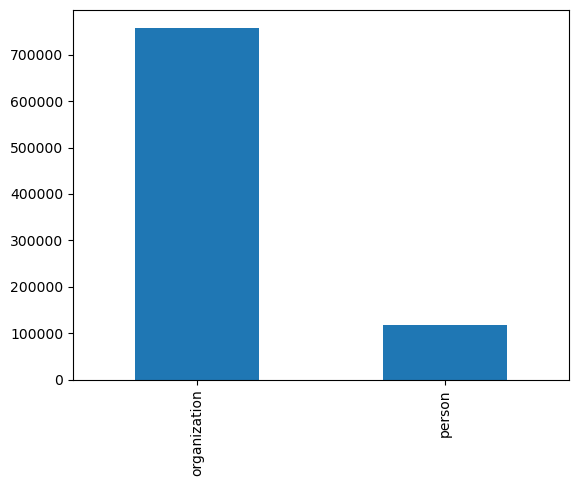

In [8]:
investers_df['investor_type'].value_counts().plot(kind='bar')

In [9]:
num_org_investor = len(investers_df.loc[investers_df['investor_type'] == 'person', :])
num_person_investor = len(investers_df.loc[investers_df['investor_type'] == 'organization', :])
num_org_investor + num_person_investor
num_org_nantype = len(investers_df.loc[investers_df['investor_type'].isnull(), :])

In [10]:
num_org_nantype

14

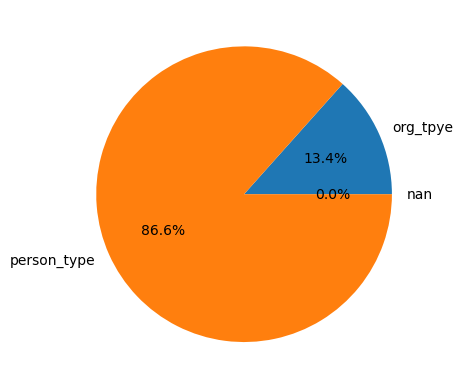

In [11]:
import matplotlib.pyplot as plt
ratio = [num_org_investor,num_person_investor,num_org_nantype]
labels = ['org_tpye','person_type','nan']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

<Axes: ylabel='investor_type'>

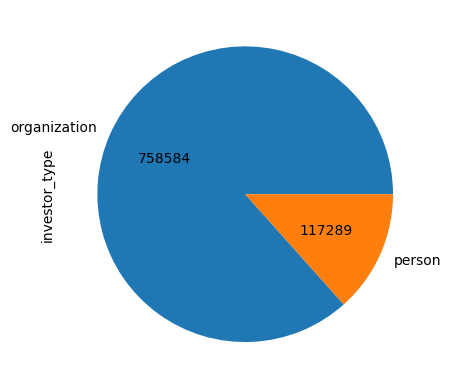

In [12]:
invest = investers_df['investor_type'].value_counts()

invest.plot.pie(autopct=lambda x: '{:.0f}'.format(x*invest.sum()/100) )

In [13]:
investers_df['is_lead_investor'].unique()

array([True, nan, False], dtype=object)

In [14]:
investers_df['investor_type'] == 'person'

0         False
1         False
2         False
3         False
4         False
          ...  
875882     True
875883    False
875884    False
875885    False
875886    False
Name: investor_type, Length: 875887, dtype: bool

In [15]:
investers_df.loc[investers_df['investor_type'] == 'person', :].count()

uuid                  117289
name                  117289
type                  117289
permalink             117289
cb_url                117289
rank                       0
created_at            117289
updated_at            117289
funding_round_uuid    117289
funding_round_name    117289
investor_uuid         117289
investor_name         117289
investor_type         117289
is_lead_investor       26275
dtype: int64

In [16]:
person_investors_df = investers_df.loc[lambda investers_df: investers_df['investor_type'] == 'person', :]

In [17]:
person_investors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117289 entries, 16 to 875882
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   uuid                117289 non-null  object 
 1   name                117289 non-null  object 
 2   type                117289 non-null  object 
 3   permalink           117289 non-null  object 
 4   cb_url              117289 non-null  object 
 5   rank                0 non-null       float64
 6   created_at          117289 non-null  object 
 7   updated_at          117289 non-null  object 
 8   funding_round_uuid  117289 non-null  object 
 9   funding_round_name  117289 non-null  object 
 10  investor_uuid       117289 non-null  object 
 11  investor_name       117289 non-null  object 
 12  investor_type       117289 non-null  object 
 13  is_lead_investor    26275 non-null   object 
dtypes: float64(1), object(13)
memory usage: 13.4+ MB


In [18]:
person_investors_df.head(5)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
16,5b3dc2bd-d20c-d591-5217-d4b35b0061ff,Silvio Scaglia investment in Series A - Babelgum,investment,silvio-scaglia-invested-in-babelgum-series-a--...,https://www.crunchbase.com/investment/silvio-s...,NaN,2007-06-09 10:18:10,2021-03-26 11:54:26,77fa462f-42a6-d077-b315-a67ceb8dad9a,Series A - Babelgum,2369a478-3dc1-0b2c-a02a-41badf63d21b,Silvio Scaglia,person,True
26,7208ad41-8199-e2de-fdd7-77b94fb688a8,Ronald Conway investment in Series A - Kyte,investment,ron-conway-invested-in-kyte-series-a--3eb015fc...,https://www.crunchbase.com/investment/ron-conw...,NaN,2007-06-14 18:34:46,2018-02-13 00:53:37,3eb015fc-4032-1173-74e5-a4bfba6f9dc7,Series A - Kyte,43b343a7-ff56-090a-63fa-5f833e55ea6d,Ronald Conway,person,NaN
30,afa4e7ec-0d3a-3406-156f-950b71e9eab7,Jonathan Dolgen investment in Series C - Veoh,investment,jonathan-dolgen-invested-in-veoh-series-c--427...,https://www.crunchbase.com/investment/jonathan...,NaN,2007-06-15 09:44:28,2018-02-13 00:55:01,4276294a-0398-7e63-2b68-78edcd9d537c,Series C - Veoh,de6e3d77-bb8c-6b8d-1793-9ef6e5e68e4f,Jonathan Dolgen,person,NaN
36,92d45362-abc2-880d-6c35-e73ebf51d0f5,Ronald Conway investment in Seed Round - Thoof,investment,ron-conway-invested-in-thoof-seed--4b50fe59--9...,https://www.crunchbase.com/investment/ron-conw...,NaN,2007-06-16 05:19:47,2018-02-13 00:54:16,4b50fe59-eebe-3d11-0e17-c354d6045385,Seed Round - Thoof,43b343a7-ff56-090a-63fa-5f833e55ea6d,Ronald Conway,person,NaN
112,22938bd1-4d7c-3db4-c7b2-2275b1bad0f2,David Mahoney investment in Series A - Surphace,investment,david-mahoney-invested-in-sphere-series-a--ad4...,https://www.crunchbase.com/investment/david-ma...,NaN,2007-07-06 11:18:04,2018-02-13 00:51:50,ad46f52c-4242-0915-896b-b3eff374bc6b,Series A - Surphace,853c5835-43ab-0b9d-622f-4531368b2f3c,David Mahoney,person,NaN


In [19]:
import networkx as nx
from networkx.algorithms import bipartite

In [20]:
network_person = person_investors_df[['investor_name', 'funding_round_name']]

,investor_name,funding_round_name
16,Silvio Scaglia,Series A - Babelgum
26,Ronald Conway,Series A - Kyte
30,Jonathan Dolgen,Series C - Veoh
36,Ronald Conway,Seed Round - Thoof
112,David Mahoney,Series A - Surphace
...,...,...
875858,Robin Haak,Series C - SmartRecruiters
875859,Robin Haak,Seed Round - Jobspotting
875860,Robin Haak,Pre Seed Round - Kombo
875863,Owen Gunden,Series B - Rebellyous Foods


In [21]:
# network_person
temp = network_person.head(100)

In [22]:
#G = nx.from_pandas_edgelist(network_person,'investor_name','funding_round_name')
G = nx.from_pandas_edgelist(temp,'investor_name','funding_round_name')

In [57]:
G.edges()
nx.write_gexf(G,'network_person.gexf')

In [36]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(peson_investors_df['investor_name'], bipartite=0)
B.add_nodes_from(person_investors_df['funding_round_name'], bipartite=1)
B.add_edges_from(G.edges())
# Add edges only between nodes of opposite node sets\#
#ㅇrg 부분에 있어서 어떻게 이걸 구성할지 고민중 . 뭐랑 뭐랑 해야할까요 / 

# 과정이 있는데 이게 펀드랑 , r

In [24]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(temp['investor_name'], bipartite=0)
B.add_nodes_from(temp['funding_round_name'], bipartite=1)
B.add_edges_from(G.edges())
# Add edges only between nodes of opposite node sets\#
#ㅇrg 부분에 있어서 어떻게 이걸 구성할지 고민중 . 뭐랑 뭐랑 해야할까요 / 

# 과정이 있는데 이게 펀드랑 , r

In [50]:
u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
nx.bipartite.maximum_matching(G, top_nodes=u)

{'Vivi Nevo': 'Series B - Spot Runner',
 'Nick Zaharias': 'Seed Round - Cake Financial',
 'Silvio Scaglia': 'Series A - Babelgum',
 'Max Levchin': 'Series A - Yelp',
 'Lukasz Gadowski': 'Angel Round - Trivop',
 'Roger Evans': 'Series A - Vudu',
 'Mark Goines': 'Series A - Mint',
 'Vipul Ved Prakash': 'Seed Round - Zivity',
 'Robert Kraft': 'Series A - MatchMine',
 'Fred Wilson': 'Angel Round - WallStrip',
 'Eilon Tirosh': 'Series A - KnockaTV',
 'Wendy Lea': 'Series A - EventVue',
 'Jeremy Coller': 'Series B - Videojug',
 'Kanwal Rekhi': 'Series A - Kaboodle',
 'Tim Connors': 'Series D - 4INFO',
 'Kevin Rose': 'Seed Round - OMGPOP',
 'Jon Callaghan': 'Seed Round - ChessPark',
 'Drew Major': 'Series A - Mozy',
 'Mitchell Kapor': 'Series A - Linden Lab',
 'Peter Gotcher': 'Series B - Pandora',
 'Marc Andreessen': 'Series A - Ning Interactive',
 'Marko Ahtisaari': 'Seed Round - Dopplr',
 'Brad Feld': 'Seed Round - Loomia',
 'John Dean': 'Series A - Affinity Circles',
 'Jonathan Dolgen': '

In [45]:
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G, pos, with_labels=False)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

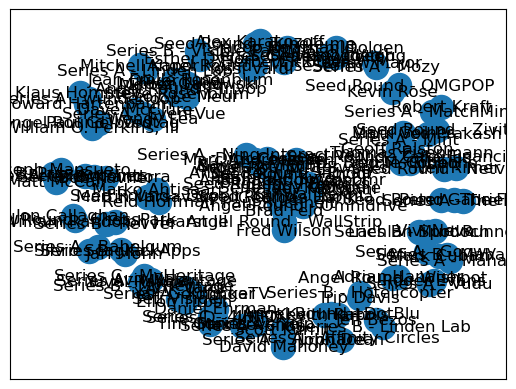

In [26]:
nx.draw_networkx(B,)

In [23]:
investors_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/investors.csv')

In [24]:
investors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243078 entries, 0 to 243077
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uuid                         243078 non-null  object 
 1   name                         243073 non-null  object 
 2   type                         243078 non-null  object 
 3   permalink                    243076 non-null  object 
 4   cb_url                       243076 non-null  object 
 5   rank                         242628 non-null  float64
 6   created_at                   243078 non-null  object 
 7   updated_at                   243078 non-null  object 
 8   roles                        243078 non-null  object 
 9   domain                       93053 non-null   object 
 10  country_code                 178642 non-null  object 
 11  state_code                   81619 non-null   object 
 12  region                       169576 non-null  object 
 13 

In [25]:
investors_df['investor_types'].unique()

array(['angel', nan, 'family_investment_office',
       'investment_partner,angel', 'venture_capital',
       'investment_partner', 'angel_group', 'private_equity_firm',
       'corporate_venture_capital,fund_of_funds,incubator',
       'corporate_venture_capital', 'incubator',
       'investment_bank,venture_capital', 'micro_vc,venture_capital',
       'micro_vc', 'private_equity_firm,venture_capital',
       'government_office,venture_capital', 'hedge_fund',
       'angel_group,venture_capital',
       'family_investment_office,investment_bank,venture_capital',
       'family_investment_office,private_equity_firm,venture_capital',
       'fund_of_funds', 'investment_bank', 'government_office',
       'government_office,incubator', 'angel_group,micro_vc',
       'family_investment_office,venture_capital',
       'corporate_venture_capital,venture_capital', 'university_program',
       'fund_of_funds,private_equity_firm,venture_capital',
       'hedge_fund,venture_capital', 'government

uuid 만 따로 뽑기 위해서 했던것 
org 와 funding 의 관계 확인하기 

In [4]:
file_list = [path + f for f in os.listdir(path) if f.startswith('organizations_part_')]
csv_list = []

for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

excel_merged = pd.concat(csv_list, ignore_index=True)

excel_merged.to_csv(path + 'organizations_list.csv', index=False)

In [6]:
org_list = pd.read_csv('bulk_export_split/organizations_list.csv')
org_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639319 entries, 0 to 2639318
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uuid                         object 
 1   name                         object 
 2   type                         object 
 3   permalink                    object 
 4   cb_url                       object 
 5   rank                         float64
 6   created_at                   object 
 7   updated_at                   object 
 8   legal_name                   object 
 9   roles                        object 
 10  domain                       object 
 11  homepage_url                 object 
 12  country_code                 object 
 13  state_code                   object 
 14  region                       object 
 15  city                         object 
 16  address                      object 
 17  postal_code                  object 
 18  status                       object 
 19  

In [7]:
orgfull = pd.read_csv('bulk_export/organizations.csv')
orgfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650088 entries, 0 to 2650087
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uuid                         object 
 1   name                         object 
 2   type                         object 
 3   permalink                    object 
 4   cb_url                       object 
 5   rank                         float64
 6   created_at                   object 
 7   updated_at                   object 
 8   legal_name                   object 
 9   roles                        object 
 10  domain                       object 
 11  homepage_url                 object 
 12  country_code                 object 
 13  state_code                   object 
 14  region                       object 
 15  city                         object 
 16  address                      object 
 17  postal_code                  object 
 18  status                       object 
 19  

In [8]:
orgfull.head(3)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,218996.0,2007-05-25 13:51:27,2022-03-07 05:47:35,NaN,company,...,206-859-6300,https://www.facebook.com/Wetpaint,NaN,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,8691.0,2007-05-26 02:30:28,2022-11-30 00:28:26,Zoho Corporation Pvt. Ltd.,"investor,company",...,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,2.0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,26502.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN


In [9]:
orgfull_discription = pd.read_csv("bulk_export/organization_descriptions.csv")
orgfull_discription.head(3)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,218996.0,2007-05-25 13:51:27,2022-03-07 05:47:35,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,8691.0,2007-05-26 02:30:28,2022-11-30 00:28:26,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,26502.0,2007-05-26 03:03:23,2018-12-10 10:09:14,Digg Inc. operates a website that enables its ...


In [13]:
funding_round = pd.read_csv("bulk_export/funding_rounds.csv")
funding_round.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,417857.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,525846.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,400570.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,99372.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,10500000.0,10500000.0,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,funding_round,geni-series-a--60e6afd9,https://www.crunchbase.com/funding_round/geni-...,416479.0,2007-05-31 20:19:28,2018-02-12 23:41:29,USA,CA,...,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c


In [21]:
is_wetpaint = funding_round['org_name'] == 'Meta'
wet_paint = funding_round[is_wetpaint]
wet_paint

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,417857.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,5.000000e+05,5.000000e+05,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,525846.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,1.270000e+07,1.270000e+07,USD,9.800000e+07,9.800000e+07,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,400570.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,2.750000e+07,2.750000e+07,USD,5.025000e+08,5.025000e+08,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
585,c26d2da6-9801-e163-2ded-617dcd0a9a65,Series C - Meta,funding_round,facebook-series-c--c26d2da6,https://www.crunchbase.com/funding_round/faceb...,510587.0,2007-10-24 16:57:56,2018-02-12 23:56:04,USA,CA,...,2.400000e+08,2.400000e+08,USD,1.500000e+10,1.500000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,fd80725f-53fc-7009-9878-aeecf1e9ffbb
1565,0f0d6b3a-2bc5-28b8-7303-381e373a9751,Series C - Meta,funding_round,facebook-series-c--0f0d6b3a,https://www.crunchbase.com/funding_round/faceb...,481935.0,2008-03-27 22:23:40,2018-02-12 23:44:33,USA,CA,...,6.000000e+07,6.000000e+07,USD,NaN,NaN,NaN,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,87e297f8-53fd-a340-cbfc-6f34d3c62a86
1813,85246d86-383d-5f3c-0611-8f0a092cdc28,Series C - Meta,funding_round,facebook-series-c--85246d86,https://www.crunchbase.com/funding_round/faceb...,225005.0,2008-05-07 19:45:59,2018-02-12 23:30:41,USA,CA,...,1.500000e+07,1.500000e+07,USD,NaN,NaN,NaN,3.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,aefa3a84-5193-00c3-5cbf-ec5ec2645672
1832,4e8faa5e-0b4f-03da-75f5-654ce3bed6bc,Debt Financing - Meta,funding_round,facebook-debt-financing--4e8faa5e,https://www.crunchbase.com/funding_round/faceb...,179225.0,2008-05-10 15:13:05,2018-02-12 22:15:00,USA,CA,...,1.000000e+08,1.000000e+08,USD,NaN,NaN,NaN,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,02f87511-2b76-0f3d-7fed-109aba6dd5a5
3824,7ac749d3-11a7-8706-1484-9c9ea8e3593f,Series C - Meta,funding_round,facebook-series-c--7ac749d3,https://www.crunchbase.com/funding_round/faceb...,527578.0,2009-01-14 21:08:39,2018-02-12 23:52:49,USA,CA,...,6.000000e+07,6.000000e+07,USD,1.482000e+10,1.482000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,87e297f8-53fd-a340-cbfc-6f34d3c62a86
5104,b0e3eb99-9048-d301-0892-26cedab900a7,Series D - Meta,funding_round,facebook-series-d--b0e3eb99,https://www.crunchbase.com/funding_round/faceb...,523983.0,2009-05-26 16:57:01,2019-10-29 22:44:47,USA,CA,...,2.000000e+08,2.000000e+08,USD,1.000000e+10,1.000000e+10,USD,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,9bc45524-5c04-54c1-ec99-5afb33cd3fc4
14081,59971bc0-0935-be60-e279-a9db5e787169,Secondary Market - Meta,funding_round,facebook-secondary-market--59971bc0,https://www.crunchbase.com/funding_round/faceb...,363014.0,2010-06-29 01:32:32,2018-09-24 23:01:15,USA,CA,...,1.200000e+08,1.200000e+08,USD,1.392000e+10,1.392000e+10,USD,3.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,8ce2fd03-05dd-ab1d-19e1-826840e305f1


망한회사 찾아보기 

In [4]:
funding_round_org_uuid = pd.read_csv("bulk_export/funding_rounds.csv")
funding_round_org_uuid = funding_round_org_uuid['org_uuid']

In [5]:
funding_round_org_uuid

0         df662812-7f97-0b43-9d3e-12f64f504fbb
1         df662812-7f97-0b43-9d3e-12f64f504fbb
2         df662812-7f97-0b43-9d3e-12f64f504fbb
3         f53cb4de-236e-0b1b-dee8-7104a8b018f9
4         4111dc8b-c0df-2d24-ed33-30cd137b3098
                          ...                 
539340    0710ed9c-30e2-411f-b386-0ddf83645dbb
539341    93c1644f-ee78-83a6-a406-fe4d06cf4a12
539342    ad5903ba-8283-49c3-a1ef-873fdfc11260
539343    be98e027-b70b-434e-9039-9e61fd5f5742
539344    b88ba41f-5821-4add-a5af-8593876617eb
Name: org_uuid, Length: 539345, dtype: object

In [6]:
organization = pd.read_csv('bulk_export/organizations.csv')
organization = organization['uuid']

In [7]:
organization

0          e1393508-30ea-8a36-3f96-dd3226033abd
1          bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7
2          5f2b40b8-d1b3-d323-d81a-b7a8e89553d0
3          f4d5ab44-058b-298b-ea81-380e6e9a8eec
4          df662812-7f97-0b43-9d3e-12f64f504fbb
                           ...                 
2650083    91d206a0-8560-4fae-a481-8bd0d478dc82
2650084    15655675-37d2-4686-a474-b4e70dc0ac12
2650085    d1f9b31f-6f1d-4cf0-9ac7-a6288c69a8ba
2650086    45b09534-94a2-4168-8e19-2b7577c552d6
2650087    8c7c2c6d-6e6f-4672-bfab-7acdf5673226
Name: uuid, Length: 2650088, dtype: object

In [8]:
organization.to_list

<bound method IndexOpsMixin.tolist of 0          e1393508-30ea-8a36-3f96-dd3226033abd
1          bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7
2          5f2b40b8-d1b3-d323-d81a-b7a8e89553d0
3          f4d5ab44-058b-298b-ea81-380e6e9a8eec
4          df662812-7f97-0b43-9d3e-12f64f504fbb
                           ...                 
2650083    91d206a0-8560-4fae-a481-8bd0d478dc82
2650084    15655675-37d2-4686-a474-b4e70dc0ac12
2650085    d1f9b31f-6f1d-4cf0-9ac7-a6288c69a8ba
2650086    45b09534-94a2-4168-8e19-2b7577c552d6
2650087    8c7c2c6d-6e6f-4672-bfab-7acdf5673226
Name: uuid, Length: 2650088, dtype: object>

In [12]:
df = funding_round_org_uuid.isin(organization)

In [13]:
df

0         True
1         True
2         True
3         True
4         True
          ... 
539340    True
539341    True
539342    True
539343    True
539344    True
Name: org_uuid, Length: 539345, dtype: bool

In [16]:
df.isnull().sum()

0

뒤에 무시

In [ ]:
import sqlite3 
connect = sqlite3.connect("chrunchbase.db")
cursor = connect.cursor()
cursor.execute("")

In [4]:
org_uuid = pd.read_csv("orguuid_for_news.csv")
org_uuid.info

<bound method DataFrame.info of                                          uuid
0        e1393508-30ea-8a36-3f96-dd3226033abd
1        bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7
2        5f2b40b8-d1b3-d323-d81a-b7a8e89553d0
3        f4d5ab44-058b-298b-ea81-380e6e9a8eec
4        df662812-7f97-0b43-9d3e-12f64f504fbb
...                                       ...
2650083  91d206a0-8560-4fae-a481-8bd0d478dc82
2650084  15655675-37d2-4686-a474-b4e70dc0ac12
2650085  d1f9b31f-6f1d-4cf0-9ac7-a6288c69a8ba
2650086  45b09534-94a2-4168-8e19-2b7577c552d6
2650087  8c7c2c6d-6e6f-4672-bfab-7acdf5673226

[2650088 rows x 1 columns]>

In [13]:
org_uuid1 = pd.read_csv('bulk_export_split/organizations_part_0.csv')
key = '8c8088100fdfac696402ca0bf6065928'

# press_references
# for pk in org_uuid1['uuid']:
#     https://api.crunchbase.com/api/v4/entities/organizations/silicon-valley-bank?card_ids=press_references&user_key=$key


'8c8088100fdfac696402ca0bf6065928'

In [12]:
org_uuid1

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,207788,2007-05-25 13:51:27,2022-03-07 05:47:35,NaN,company,...,206-859-6300,https://www.facebook.com/Wetpaint,NaN,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,9310,2007-05-26 02:30:28,2022-11-30 00:28:26,Zoho Corporation Pvt. Ltd.,"investor,company",...,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,2.0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,27831,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,57343,2007-05-26 03:21:34,2022-07-19 01:45:23,NaN,"investor,company",...,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,55.0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,18,2007-05-26 04:22:15,2022-08-05 13:19:05,"Meta Platforms, Inc.","investor,company",...,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://twitter.com/Meta,https://res.cloudinary.com/crunchbase-producti...,Facebook,"Facebook, Inc.",NaN,company,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,7f70b123-7ed1-ba5a-aab4-c500e2787689,Rebate Bus,organization,rebate-bus-llc,https://www.crunchbase.com/organization/rebate...,103148,2017-07-23 15:11:46,2022-07-19 01:48:28,"Rebate Bus, Inc.",company,...,+1 608 513 9408,https://www.facebook.com/rebatebus/,https://www.linkedin.com/company/rebate-bus/,https://www.twitter.com/rebatebus,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
499995,e11cfce7-df2c-a97e-18d5-cc4d9dfa19ae,Social n' Tech,organization,social-n-tech,https://www.crunchbase.com/organization/social...,2484566,2017-07-23 15:49:34,2022-05-20 02:35:22,NaN,company,...,NaN,https://web.facebook.com/socialntech/,NaN,https://twitter.com/SocialnTech,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
499996,0cee7f1d-36ff-391f-2a05-3692d7025c6a,Sentiment Search,organization,sentiment-search,https://www.crunchbase.com/organization/sentim...,407643,2017-07-23 15:55:52,2021-04-13 08:51:06,NaN,company,...,+44 (0) 207 867 3980,https://www.facebook.com/sentimentsearch/,https://www.linkedin.com/company/sentiment-search,https://twitter.com/SentimentSearch,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
499997,0aa0c294-d374-c53c-bdc1-5fb55550dfa7,EmployAmp,organization,employamp,https://www.crunchbase.com/organization/employamp,1647277,2017-07-23 15:56:05,2019-06-24 21:31:44,NaN,company,...,(804)464-8816,https://www.facebook.com/EmployAmp/,https://www.linkedin.com/company-beta/11212927/,https://www.twitter.com/employamp,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
